In [23]:
import numpy as np
import pandas as pd
from datetime import datetime

# Функция для генерации данных с настройкой для каждой группы
def generate_ab_test_data(n_control, n_experiment, start_date, end_date, control_conversion_rate, experiment_conversion_rate, control_arpu_mean, experiment_arpu_mean):
    # Список дней эксперимента
    date_range = pd.date_range(start=start_date, end=end_date, freq='H')
    
    # Генерация дат посещений
    def generate_session_dates(n_sessions):
        return np.random.choice(date_range, size=n_sessions, replace=True)

    # Вероятностные распределения
    product_views_dist = np.random.poisson(5, size=n_control + n_experiment)  # Поассоново распределение для просмотров
    cart_adds_dist = np.random.poisson(2, size=n_control + n_experiment)  # Поассоново распределение для добавлений в корзину
    session_duration_dist = np.random.exponential(scale=10, size=n_control + n_experiment)  # Экспоненциальное распределение времени сессий
    
    # Распределение для device_type, traffic_source, region
    device_type_dist = np.random.choice(['mobile', 'desktop', 'tablet'], p=[0.7, 0.25, 0.05], size=n_control + n_experiment)
    traffic_source_dist = np.random.choice(['organic', 'paid_ad', 'direct'], p=[0.5, 0.3, 0.2], size=n_control + n_experiment)
    region_dist = np.random.choice(['Estonia', 'Latvia', 'Lithuania'], p=[0.3, 0.4, 0.3], size=n_control + n_experiment)

    # Генерация данных для контрольной группы
    control_data = {
        'user_id': np.arange(1, n_control + 1),
        'group': ['control'] * n_control,
        'session_date': generate_session_dates(n_control),
        'product_views': product_views_dist[:n_control],
        'cart_adds': cart_adds_dist[:n_control],
        'purchase_amount': np.where(np.random.rand(n_control) < control_conversion_rate,  # Вероятность конверсии для контрольной группы
                                    np.random.exponential(scale=control_arpu_mean, size=n_control), 0),  # Экспоненциальное распределение суммы покупок
        'session_duration': session_duration_dist[:n_control],
        'device_type': device_type_dist[:n_control],
        'traffic_source': traffic_source_dist[:n_control],
        'region': region_dist[:n_control]
    }

    # Генерация данных для экспериментальной группы
    experiment_data = {
        'user_id': np.arange(n_control + 1, n_control + n_experiment + 1),
        'group': ['experiment'] * n_experiment,
        'session_date': generate_session_dates(n_experiment),
        'product_views': product_views_dist[n_control:],
        'cart_adds': cart_adds_dist[n_control:],
        'purchase_amount': np.where(np.random.rand(n_experiment) < experiment_conversion_rate,  # Вероятность конверсии для экспериментальной группы
                                    np.random.exponential(scale=experiment_arpu_mean, size=n_experiment), 0),  # Экспоненциальное распределение суммы покупок
        'session_duration': session_duration_dist[n_control:],
        'device_type': device_type_dist[n_control:],
        'traffic_source': traffic_source_dist[n_control:],
        'region': region_dist[n_control:]
    }

    # Преобразуем в DataFrame
    df_control = pd.DataFrame(control_data)
    df_experiment = pd.DataFrame(experiment_data)
    
    # Объединяем контрольную и экспериментальную группы
    df = pd.concat([df_control, df_experiment], ignore_index=True)
    
    # Сохраняем датасет
    #df.to_csv('rimi_ab_test_data_with_exponential_purchase.csv', index=False)

    return df

# Настраиваем параметры для контрольной и экспериментальной групп
n_control = 4361
n_experiment = 4361
start_date = '2024-08-05'
end_date = '2024-08-14'
control_conversion_rate = 0.05  # 5% вероятность конверсии для контрольной группы
experiment_conversion_rate = 0.07  # 7% вероятность конверсии для экспериментальной группы
control_arpu_mean = 50  # Средний ARPU для контрольной группы
experiment_arpu_mean = 55  # Средний ARPU для экспериментальной группы

# Генерация данных
df = generate_ab_test_data(n_control, n_experiment, start_date, end_date, control_conversion_rate, experiment_conversion_rate, control_arpu_mean, experiment_arpu_mean)

# Пример первых строк датасета
print(df.head())


   user_id    group        session_date  product_views  cart_adds  \
0        1  control 2024-08-08 00:00:00              4          4   
1        2  control 2024-08-07 20:00:00              3          3   
2        3  control 2024-08-11 16:00:00              3          0   
3        4  control 2024-08-11 04:00:00              3          1   
4        5  control 2024-08-10 14:00:00              0          2   

   purchase_amount  session_duration device_type traffic_source     region  
0              0.0         22.100954      mobile         direct    Estonia  
1              0.0          5.204002      mobile         direct     Latvia  
2              0.0         14.305938      mobile        paid_ad    Estonia  
3              0.0          0.854743      mobile        organic     Latvia  
4              0.0          6.932301      mobile        organic  Lithuania  


C:\Users\ireev\AppData\Local\Temp\ipykernel_100828\4003274295.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='H')


In [24]:
df.head()

,user_id,group,session_date,product_views,cart_adds,purchase_amount,session_duration,device_type,traffic_source,region
0,1,control,2024-08-08 00:00:00,4,4,0.0,22.100954,mobile,direct,Estonia
1,2,control,2024-08-07 20:00:00,3,3,0.0,5.204002,mobile,direct,Latvia
2,3,control,2024-08-11 16:00:00,3,0,0.0,14.305938,mobile,paid_ad,Estonia
3,4,control,2024-08-11 04:00:00,3,1,0.0,0.854743,mobile,organic,Latvia
4,5,control,2024-08-10 14:00:00,0,2,0.0,6.932301,mobile,organic,Lithuania


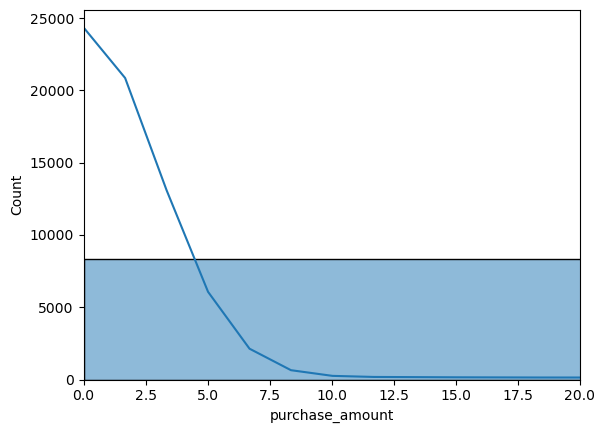

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['purchase_amount'], kde=True)
plt.xlim(0, 20)  # Ограничиваем отображаемый диапазон от 0 до 50
plt.show()